Computational Linguistics Project

*Winter semester, 2018-2019*

**Sourav Dutta (2576494)**

# Can we find Synonyms and Antonyms from word embedding analogy?

## 1. Import all necessary libraries

In [728]:
import os
import random                      
                                        
import numpy as np                    # for mathematical calculations
import pandas as pd                   # for loading dataset
import matplotlib.pyplot as plt       # for plotting graphs and visualizations

from sklearn.manifold import TSNE     # for dimensionality reduction needed for visualization

from nltk.corpus import wordnet as wn # wordnet corpus to find synonyms and antonyms for given input word

## 2. Load the pre-trained GloVe embeddings

**NOTE: In order to make this work, we need to first download 
the pre-trained GloVe embeddings provided by Stanford.**

They can be downloaded here: https://nlp.stanford.edu/projects/glove/

In [729]:
'''
This shows us the list of GloVe embedding files available.
However, we will be using the 'glove.6B.300d.txt' file
containing 300 dimensional vector embeddings for each word.
'''

os.listdir('embeddings')          # list of pre-trained GloVe embedding files

['glove.6B.200d.txt',
 'glove.6B.50d.txt',
 'glove.6B.300d.txt',
 'glove.6B.100d.txt']

In [42]:
'''
function load_embeddings(file_path):

This function helps us to load the embedding file for use.
We parse the embedding file into proper usage format, 
returning a complete list of unique words as our 
vocabulary and the corresponding dictionary of word
vectors for each of those words from the embeddings.
'''

def load_embeddings(file_path):
    
    '''
    We use a set() data structure here because we need
    a collection of unique words only.
    '''
    word_vocabulary = set()
    
    '''
    We use a dictionary for storing word vectors for each
    of the words from the vocabulary.
    '''
    word_2_vectors = {}
    
    with open(file_path, 'r') as file:
        for line in file:
            
            '''
            We use the strip() method in order to avoid any
            whitespace characters (space, tabs, etc.) from each
            line in the file.
            '''
            line = line.strip()
            
            vectors = line.split()
            word = vectors[0]
            
            word_vocabulary.add(word)
            
            '''
            Each word vector is stored as a numpy array so that
            it is easier to work with in the further calculations.
            '''
            word_2_vectors[word] = np.array(vectors[1:], dtype='float')
    
    return word_vocabulary, word_2_vectors

In [43]:
'''
We had previously experimented with all the 4 kinds of GloVe input files 
that we got from Stanford website. However, in the end we decided to 
finalize the word embeddings with the highest dimensions (300) as they are
able to capture more information about each word.
'''

########################################################################
# NOTE: Use the directory path in your local system to make this work! #
########################################################################

# file_path_GloVe_50d = 'embeddings/glove.6B.50d.txt'
# file_path_GloVe_100d = 'embeddings/glove.6B.100d.txt'
# file_path_GloVe_200d = 'embeddings/glove.6B.200d.txt'

file_path_GloVe_300d = 'embeddings/glove.6B.300d.txt'

# vocabulary_50d, word_vectors_50d = load_embeddings(file_path_GloVe_50d)
# vocabulary_100d, word_vectors_100d = load_embeddings(file_path_GloVe_100d)
# vocabulary_200d, word_vectors_200d = load_embeddings(file_path_GloVe_200d)

vocabulary_300d, word_vectors_300d = load_embeddings(file_path_GloVe_300d)

# print('Total number of unique words (vocabulary) in 50 dimensional embeddings: %d' % len(vocabulary_50d))
# print('Total number of unique words (vocabulary) in 100 dimensional embeddings: %d' % len(vocabulary_100d))
# print('Total number of unique words (vocabulary) in 200 dimensional embeddings: %d' % len(vocabulary_200d))

print('Total number of unique words (vocabulary) in 300 dimensional embeddings: %d' % len(vocabulary_300d))

Total number of unique words (vocabulary) in 300 dimensional embeddings: 400000


## 3. Visualize the pre-trained GloVe embeddings with t-SNE

In [230]:
'''
function get_visualization_matrix(words, dim=300):

This function is used in order to 
'''

def get_visualization_matrix(words, dim=300):
    
    words_matrix = np.random.randn(len(words), dim)
    i = 0
    
    for word in words:
        words_matrix[i] = word_vectors_300d[word]
        i += 1
    
    return words_matrix

Sample words:

['lion', 'school', 'kind', 'love', 'give', 'sleep', 'early', 'never', 'under', 'into']


In [719]:
'''
First we define the tsne variable using the TSNE function.

n_components =  The number of components that we would like 
                to reduce the dimmensionality to. Here, we
                want to visualize the words in a 2d vector 
                space, so the value is 2.

verbose      =  This parameter is used to output the log text

perplexity   =  The perplexity is related to the number of nearest
                neighbors that is used in other manifold learning 
                algorithms.

method       =  The exact algorithm should be used when 
                nearest-neighbor errors need to be better than 3%.
'''

tsne = TSNE(n_components=2, 
            verbose=0, 
            perplexity=3, 
            method='exact')

In [720]:
'''
function get_tsne_results(words):


'''

def get_tsne_results(words):
    
    '''
    First we get the visual matrix for the list of input words
    which we want to show in the visualization.
    '''
    visual_matrix = get_visualization_matrix(words)
    
    '''
    Next we use the fit.transform() method of tsne in order to
    reduce the dimensionality of the word embeddings.
    '''
    tsne_results = tsne.fit_transform(visual_matrix)
    
    '''
    We return the new word embedding vectors in the reduced
    dimension.
    '''
    return tsne_results

In [721]:
'''
Here we provide a sample list of words that we would like to visualize
using t-SNE in a 2d vector space.
'''

sample_words = ['lion', 'school', 'kind', 'love', 'give', 'sleep', 'early', 'never', 'under', 'into']

print('Sample words:\n\n%s' % sample_words)

'''
We call the get_tsne_results() function with the
sample_words list as input to obtain the word
embeddings for those words.
'''

tsne_results = get_tsne_results(sample_words)

Sample words:

['lion', 'school', 'kind', 'love', 'give', 'sleep', 'early', 'never', 'under', 'into']


In [234]:
'''
function visualize_words(words, tsne_results):

In this function, we try to finally visualize the words in a
2d vector space.
'''

def visualize_words(words, tsne_results):
    
    '''
    Size of the plot/figure
    '''
    plt.figure(figsize=(20, 10))
    
    '''
    We use the scatter plot feature of matplotlib for visualization
    '''
    plt.scatter(tsne_results[:,0], tsne_results[:,1], cmap=plt.get_cmap('Spectral'))
    
    '''
    This block of code is used for annotation of the points with the
    corresponding word text
    '''
    for label, x, y in zip(words, tsne_results[:, 0], tsne_results[:, 1]):
        plt.annotate(label, 
                     xy=(x, y), 
                     xytext=(-14, 14), 
                     textcoords='offset points',
                     fontsize=20)

    '''
    Some further features of the visualization
    '''
    plt.xlabel('t-SNE Component 1', fontsize=20)
    plt.ylabel('t-SNE Component 2', fontsize=20)
    plt.title('GloVe visualization using t-SNE', fontsize=20)

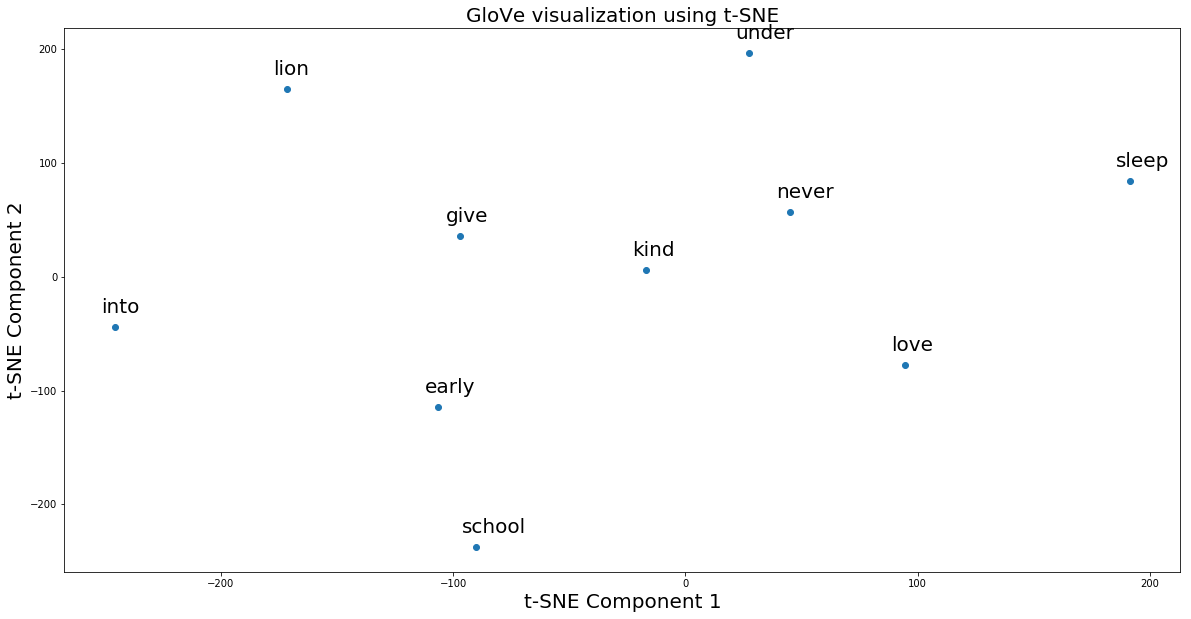

In [235]:
'''
Here we call the visualize_words() function with the
sample_words input list in order to visualize them
on the 2d vector space.
'''
visualize_words(sample_words, get_tsne_results(sample_words))

## 4. Similarity between pair of words using Cosine Similarity

In [122]:
'''
function calculate_cosine_similarity(word1_vector, word2_vector):

Here in this function we calculate the cosine similarity between
any two given words using their word embedding vectors.
'''

def calculate_cosine_similarity(word1_vector, word2_vector):
    
    '''
    The numerator is a dot product between the two vectors
    '''
    numerator = word1_vector.dot(word2_vector)
    
    '''
    The denominator is the product of norms the two vectors, 
    which is, square root of the sum of squares.
    '''
    denominator = np.sqrt(np.sum(np.square(word1_vector))) * np.sqrt(np.sum(np.square(word2_vector)))
    
    return numerator / denominator

### Testing the cosine similarity between different pairs of words

In [156]:
# Testing similarity scores between word pair samples

############################
# Family and relationships #
############################

    # father - mother

print(calculate_cosine_similarity(word_vectors_300d['father'], word_vectors_300d['mother']))

    # father - baby

print(calculate_cosine_similarity(word_vectors_300d['father'], word_vectors_300d['baby']))

    # mother - baby

print(calculate_cosine_similarity(word_vectors_300d['mother'], word_vectors_300d['baby']))


#########################
# Places and activities #
#########################
    
    # office - work

print(calculate_cosine_similarity(word_vectors_300d['office'], word_vectors_300d['work']))

    # playground - work

print(calculate_cosine_similarity(word_vectors_300d['playground'], word_vectors_300d['work']))


###########################################
# Geographical locations (and capitals ?) #
###########################################

    # germany - berlin

print(calculate_cosine_similarity(word_vectors_300d['germany'], word_vectors_300d['berlin']))

    # germany - stuttgart

print(calculate_cosine_similarity(word_vectors_300d['germany'], word_vectors_300d['stuttgart']))

    # germany - toronto

print(calculate_cosine_similarity(word_vectors_300d['germany'], word_vectors_300d['toronto']))


##########################
# Synonyms and Anotonyms #
##########################

# love - affection

print(calculate_cosine_similarity(word_vectors_300d['love'], word_vectors_300d['affection']))

# love - hatred

print(calculate_cosine_similarity(word_vectors_300d['love'], word_vectors_300d['hatred']))

0.7568217373652817
0.39150782850154353
0.5449445962780685
0.41597764093779904
0.05061528045061367
0.6456044179249635
0.5022534169465177
0.08017156167913571
0.5818218483965079
0.3263724032698907


### 4.1. Family and relationships

|Word 1|Word 2|Similarity Score|Percentage Similar|
|------|------|----------------|------------------|
|father|mother|0.756821|75.68 %|
|father|baby|0.391507|39.15 %|
|mother|baby|0.544944|54.49 %|

### 4.2. Places and activities

|Word 1|Word 2|Similarity Score|Percentage Similar|
|------|------|----------------|------------------|
|office|work|0.415977|41.60 %|
|playground|work|0.050615|5.06 %|

### 4.3. Geographical locations (and capitals ?)

|Word 1|Word 2|Similarity Score|Percentage Similar|
|------|------|----------------|------------------|
|germany|berlin|0.645604|64.56 %|
|germany|stuttgart|0.502253|50.23 %|
|germany|toronto|0.080171|8.02 %|

### 4.4. Synonyms and Antonyms

|Word 1|Word 2|Similarity Score|Percentage Similar|
|------|------|----------------|------------------|
|love|affection|0.581821|58.18 %|
|love|hatred|0.326372|32.64 %|

## 5. Synonyms and Antonyms using WordNet

In [221]:
'''
function get_synonyms(word):

In this function, we try to find a list of synonyms 
for a given input word using the NLTK WordNet corpus.
'''
def get_synonyms(word):
    
    synonyms = []
    
    '''
    We find all possible synonyms for the word using all
    the synsets that word has.
    '''
    for synset in wn.synsets(word):
        
        '''
        We check all the 'lemmas' for each synset of the
        word.
        '''
        for lemma in synset.lemmas():
            
            synonyms.append(lemma.name())
    
    '''
    We return a list of set of the synonyms. This is done in 
    order to make sure that we get a unique list of synonyms.
    '''
    return list(set(synonyms))

In [222]:
'''
function get_antonyms(word):

In this function, we try to find a list of antonyms 
for a given input word using the NLTK WordNet corpus.
'''
def get_antonyms(word):
    
    antonyms = []
    
    '''
    We find all possible antonyms for the word using all
    the synsets that word has.
    '''
    for synset in wn.synsets(word):
        
        '''
        We check all the 'lemmas' for each synset of the
        word.
        '''
        for lemma in synset.lemmas():
           
            if lemma.antonyms():
                antonyms.append(lemma.antonyms()[0].name())
                
    '''
    We return a list of set of the synonyms. This is done in 
    order to make sure that we get a unique list of antonyms.
    '''
    return list(set(antonyms))

### 5.1. Testing synonyms and antonyms for different parts of speech

In [319]:
#########
# Nouns #
#########

noun = 'earthquake'

print('Word: %s' % noun)
print('Synonyms: %s' % get_synonyms(noun))
print('Antonyms: %s' % get_antonyms(noun))

##############
# Adjectives #
##############

adjective = 'talented'

print('\nWord: %s' % adjective)
print('Synonyms: %s' % get_synonyms(adjective))
print('Antonyms: %s' % get_antonyms(adjective))

#########
# Verbs #
#########

verb = 'walk'

print('\nWord: %s' % verb)
print('Synonyms: %s' % get_synonyms(verb))
print('Antonyms: %s' % get_antonyms(verb))

################
# Prepositions #
################

preposition = 'below'

print('\nWord: %s' % preposition)
print('Synonyms: %s' % get_synonyms(preposition))
print('Antonyms: %s' % get_antonyms(preposition))

###########
# Adverbs #
###########

adverb = 'quickly'

print('\nWord: %s' % adverb)
print('Synonyms: %s' % get_synonyms(adverb))
print('Antonyms: %s' % get_antonyms(adverb))

Word: earthquake
Synonyms: ['earthquake', 'temblor', 'seism', 'quake']
Antonyms: []

Word: talented
Synonyms: ['talented', 'gifted']
Antonyms: ['untalented']

Word: walk
Synonyms: ['walkway', 'pass', 'take_the_air', 'base_on_balls', 'walk', 'paseo', 'walk_of_life', 'walking', 'manner_of_walking']
Antonyms: ['ride']

Word: below
Synonyms: ['downstairs', 'down_the_stairs', 'to_a_lower_place', 'beneath', 'at_a_lower_place', 'below', 'under', 'infra', 'on_a_lower_floor']
Antonyms: ['above', 'upstairs']

Word: quickly
Synonyms: ['speedily', 'apace', 'rapidly', 'quickly', 'cursorily', 'chop-chop', 'promptly', 'quick']
Antonyms: ['slowly']


## 6. Get related words using relationship between embeddings

In [360]:
'''
function get_related_word(word1, word2, word3, word_vectors=word_vectors_300d):

------------------------------------------------------------------------------------
word1, word2 =  These are the given input word pair which are taken as reference
                to find the new word for another input word.

word3        =  The new input word for which we need to find a related word.

word_vectors =  This is the dictionary of word vectors. By default, we are using
                the 300 dimensional word vector dictionary that we calculated before.
-------------------------------------------------------------------------------------

This function is used to find a similar word for a given new input word using the
similarity relationship between a pair of words.
'''

def get_related_word(word1, word2, word3, word_vectors=word_vectors_300d):
    
    '''
    This parameter is used for comparison purpose. We use this to find
    and store the maximum similarity value between word embedding vectors.
    '''
    max_similarity = -1000
    
    '''
    We make sure that all the words that we are dealing with are in the lowercase
    because the word embedding dictionary contains all lowercase forms of the words.
    '''
    word1, word2, word3 = word1.lower(), word2.lower(), word3.lower()
    
    '''
    We calculate the word vector value from the existing word vectors here.
    '''
    new_word_vector = word_vectors[word3] - (word_vectors[word1] - word_vectors[word2])
    
    '''
    We have the new word vector. Now we try to find the nearest possible similar word 
    corresponding to that vector from our vocabulary of words.
    '''
    for word in vocabulary_300d:
        
        vector = word_vectors[word]
        
        '''
        TO find simlilarity, we use our calculate_cosine_similarity() function.
        '''
        similarity = calculate_cosine_similarity(word1_vector=new_word_vector, word2_vector=vector)
        
        '''
        Here we check if the similarity of the words is greater than the 
        maximum similarity value that we already have in the iteration process.'''
        if similarity > max_similarity:
            max_similarity = similarity
            word4 = word
    
    return word4

### Testing the analogy relationships between different words

In [521]:
######################################
# Gender-based analogy relationships #
######################################

# king -> queen ... man -> ?

print('"king" is related to "queen", as "man" is related to -> "%s"' 
      % get_related_word('king', 'queen', 'man'))

# brother -> sister ... prince -> ?

print('"brother" is related to "sister", as "prince" is related to -> "%s"' 
      % get_related_word('brother', 'sister', 'prince'))

"king" is related to "queen", as "man" is related to -> "woman"
"brother" is related to "sister", as "prince" is related to -> "princess"


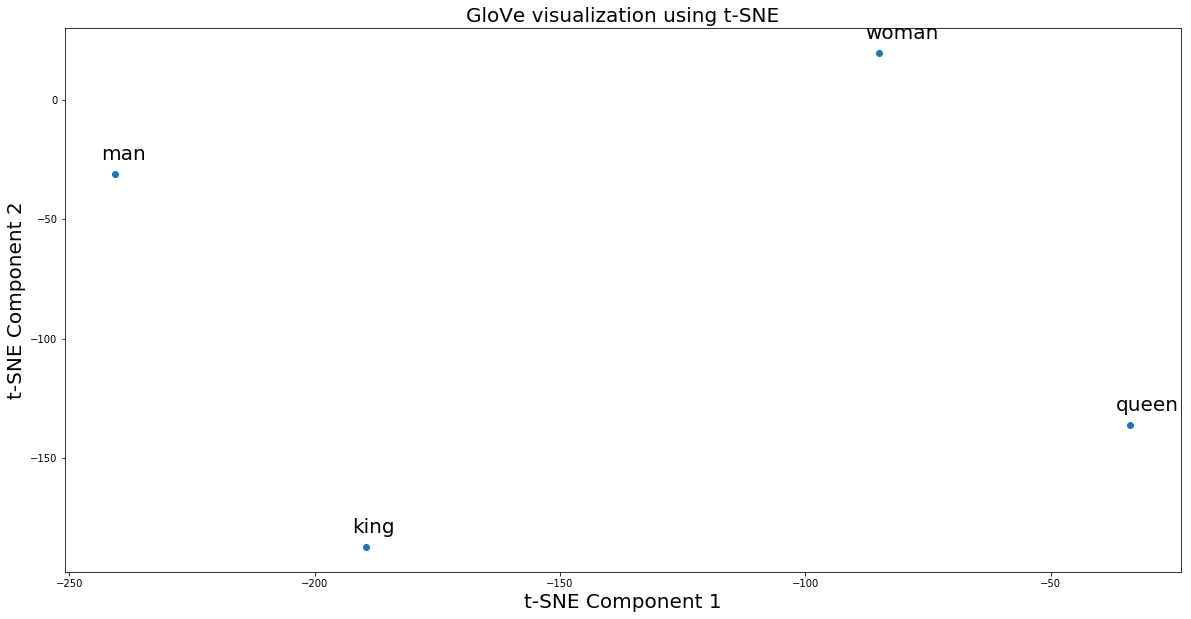

In [512]:
'''
Here we try to visualize the words 'king', 'queen', 'woman' and 'man'
in a 2d vector-space in order to understand their relationship 
similarity visually.
'''

sample_words = ['king', 'queen', 'woman', 'man']
visualize_words(sample_words, get_tsne_results(sample_words))

In [513]:
################################
# Family analogy relationships #
################################

# father -> mother ... son -> ?

print('"father" is related to "mother", as "son" is related to -> "%s"' 
      % get_related_word('father', 'mother', 'son'))

# grandfather -> grandmother ... father -> ?

print('"grandfather" is related to "grandmother", as "father" is related to -> "%s"' 
      % get_related_word('grandfather', 'grandmother', 'father'))

"father" is related to "mother", as "son" is related to -> "daughter"
"grandfather" is related to "grandmother", as "father" is related to -> "mother"


In [722]:
#########################################
# Country-capital analogy relationships #
#########################################

# germany -> berlin ... japan -> ?

print('"germany" is related to "berlin", as "japan" is related to -> "%s"' 
      % get_related_word('germany', 'berlin', 'japan'))

# germany -> berlin ... france -> ?

print('"germany" is related to "berlin", as "france" is related to -> "%s"' 
      % get_related_word('germany', 'berlin', 'france'))

# germany -> berlin ... russia -> ?

print('"germany" is related to "berlin", as "russia" is related to -> "%s"' 
      % get_related_word('germany', 'berlin', 'russia'))

#########################################
# Capital-country analogy relationships #
#########################################

# berlin -> germany ... delhi -> ?

print('\n"berlin" is related to "germany", as "delhi" is related to -> "%s"' 
      % get_related_word('berlin', 'germany', 'delhi'))

"germany" is related to "berlin", as "japan" is related to -> "tokyo"
"germany" is related to "berlin", as "france" is related to -> "paris"
"germany" is related to "berlin", as "russia" is related to -> "moscow"

"berlin" is related to "germany", as "delhi" is related to -> "india"


In [462]:
###########################################################
# Country-capital analogy relationships (not so accurate) #
###########################################################

# germany -> berlin ... australia -> ?

print('"germany" is related to "berlin", as "australia" is related to -> "%s"' 
      % get_related_word('germany', 'berlin', 'australia'))

# germany -> berlin ... canada -> ?

print('"germany" is related to "berlin", as "canada" is related to -> "%s"' 
      % get_related_word('germany', 'berlin', 'canada'))

"germany" is related to "berlin", as "australia" is related to -> "sydney"
"germany" is related to "berlin", as "canada" is related to -> "canada"


### Synonym analogy relationships

In [724]:
############################
# Not so accurate antonyms #
############################

# intelligent -> clever ... stupid -> ?

print('"intelligent" is related to "clever", as "stupid" is related to -> "%s"' 
      % get_related_word('intelligent', 'clever', 'stupid'))

# hot -> warm ... cold -> ?

print('"hot" is related to "warm", as "cold" is related to -> "%s"' 
      % get_related_word('hot', 'warm', 'cold'))

######################################
# Comparative-Superlative adjectives #
######################################

# better -> best ... worse -> ?

print('\n"better" is related to "best", as "worse" is related to -> "%s"' 
      % get_related_word('better', 'best', 'worse'))

#########################
# Singular-plural forms #
#########################

# cow -> cows ... horse -> ?

print('\n"cow" is related to "cows", as "horse" is related to -> "%s"' 
      % get_related_word('cow', 'cows', 'horse'))

"intelligent" is related to "clever", as "stupid" is related to -> "stupid"
"hot" is related to "warm", as "cold" is related to -> "cold"

"better" is related to "best", as "worse" is related to -> "worst"

"cow" is related to "cows", as "horse" is related to -> "horses"


### Antonym analogy relationships

In [726]:
#######################
# Synonyms (arguable) #
#######################

# live -> die ... stay -> ?

print('"live" is related to "die", as "stay" is related to -> "%s"' 
      % get_related_word('live', 'die', 'stay'))

# feed -> starve ... live -> ?

print('"feed" is related to "starve", as "live" is related to -> "%s"' 
      % get_related_word('feed', 'starve', 'live'))

# good -> bad ... kind -> ?

print('"good" is related to "bad", as "kind" is related to -> "%s"' 
      % get_related_word('good', 'bad', 'kind'))

######################################
# Comparative-Superlative adjectives #
######################################

# better -> worse ... best -> ?

print('\n"better" is related to "worse", as "best" is related to -> "%s"' 
      % get_related_word('better', 'worse', 'best'))

"live" is related to "die", as "stay" is related to -> "die"
"feed" is related to "starve", as "live" is related to -> "starve"
"good" is related to "bad", as "kind" is related to -> "bad"

"better" is related to "worse", as "best" is related to -> "worst"
